In [2]:
from tqdm import tqdm
from convokit import Corpus, Speaker, Utterance
from collections import defaultdict

In [3]:
# replace the directory with where your downloaded cornell movie dialogs corpus is saved
data_dir = "C:\\Users\\Vinay\\OneDrive\\Documents\\GitHub\\Coordination\\ijcnlp_dailydialog\\"

In [4]:
with open(data_dir + "dialogues_text.txt", "r", encoding='utf-8', errors='ignore') as f:
    dialog_data = f.readlines()

In [5]:
utterance_data = []
count = 0
for utterance in tqdm(dialog_data):
    
    utterance_data.append( [info.strip( ) for info in utterance.split(" __eou__")])

100%|██████████| 13118/13118 [00:00<00:00, 267708.94it/s]


In [6]:

for i in range(len(utterance_data)):
    utterance_data[i].pop()

In [7]:
#adding utterance index for a dialog
x=0
for i in range(len(utterance_data)):
    for j in range(len(utterance_data[i])):
        utterance_data[i][j]+=" __alp__ "+(str(j+x))
    x+=len(utterance_data[i])
        

In [8]:
with open(data_dir + "dialogues_act.txt", "r", encoding='utf-8', errors='ignore') as f:
    dialog_act = f.readlines()

In [9]:
utterance_act=[]
for utterance in tqdm(dialog_act):
    
    utterance_act.append([info.strip() for info in utterance.split(" ")])

100%|██████████| 13118/13118 [00:00<00:00, 596160.88it/s]


In [10]:
for i in range(len(utterance_data)):
    for j in range(len(utterance_data[i])):
        utterance_data[i][j]+=" __alp__ "+utterance_act[i][j]

In [11]:
with open(data_dir + "dialogues_emotion.txt", "r", encoding='utf-8', errors='ignore') as f:
    dialog_emotion = f.readlines()

In [12]:
utterance_emotion=[]
for utterance in tqdm(dialog_emotion):
    
    utterance_emotion.append([info.strip() for info in utterance.split(" ")])

100%|██████████| 13118/13118 [00:00<00:00, 121465.06it/s]


In [13]:
#emotion index
for i in range(len(utterance_data)):
    for j in range(len(utterance_data[i])):
        utterance_data[i][j]+=" __alp__ "+utterance_emotion[i][j]

In [14]:
utterance_data[1]

['So Dick , how about getting some coffee for tonight ? __alp__ 2 __alp__ 3 __alp__ 4',
 'Coffee ? I don ’ t honestly like that kind of stuff . __alp__ 3 __alp__ 4 __alp__ 2',
 'Come on , you can at least try a little , besides your cigarette . __alp__ 4 __alp__ 3 __alp__ 0',
 'What ’ s wrong with that ? Cigarette is the thing I go crazy for . __alp__ 5 __alp__ 1 __alp__ 1',
 'Not for me , Dick . __alp__ 6 __alp__ 1 __alp__ 0']

In [15]:
#adding speakers
#we will assume speaker 0 and 1 speaking alternatively
for i in range(len(utterance_data)):
    for j in range(len(utterance_data[i])):
        utterance_data[i][j]+=" __alp__ "+str(2*i+j%2)
utterance_data[1]


['So Dick , how about getting some coffee for tonight ? __alp__ 2 __alp__ 3 __alp__ 4 __alp__ 2',
 'Coffee ? I don ’ t honestly like that kind of stuff . __alp__ 3 __alp__ 4 __alp__ 2 __alp__ 3',
 'Come on , you can at least try a little , besides your cigarette . __alp__ 4 __alp__ 3 __alp__ 0 __alp__ 2',
 'What ’ s wrong with that ? Cigarette is the thing I go crazy for . __alp__ 5 __alp__ 1 __alp__ 1 __alp__ 3',
 'Not for me , Dick . __alp__ 6 __alp__ 1 __alp__ 0 __alp__ 2']

In [16]:
#conversation id
for i in range(len(utterance_data)):
    for j in range(len(utterance_data[i])):
        utterance_data[i][j]+=" __alp__ "+str(i)

In [17]:
utterance_data[1]

['So Dick , how about getting some coffee for tonight ? __alp__ 2 __alp__ 3 __alp__ 4 __alp__ 2 __alp__ 1',
 'Coffee ? I don ’ t honestly like that kind of stuff . __alp__ 3 __alp__ 4 __alp__ 2 __alp__ 3 __alp__ 1',
 'Come on , you can at least try a little , besides your cigarette . __alp__ 4 __alp__ 3 __alp__ 0 __alp__ 2 __alp__ 1',
 'What ’ s wrong with that ? Cigarette is the thing I go crazy for . __alp__ 5 __alp__ 1 __alp__ 1 __alp__ 3 __alp__ 1',
 'Not for me , Dick . __alp__ 6 __alp__ 1 __alp__ 0 __alp__ 2 __alp__ 1']

In [18]:
utterance_data_new=[]
for xs in utterance_data:
    for x in xs:
        utterance_data_new.append(x)
utterance_data_new[-2]

"Ok , I'll get this rate right away . __alp__ 102978 __alp__ 4 __alp__ 0 __alp__ 26235 __alp__ 13117"

In [19]:
speaker_meta={}
for i in range(26236):
    speaker_meta[str(i)]={"speaker_id": i}

In [20]:
corpus_speakers = {k: Speaker(id = k, meta = v) for k,v in speaker_meta.items()}

In [21]:
utterance_corpus = {}
count = 0
for utterance in tqdm(utterance_data_new):
    
    utterance_info = [info.strip() for info in utterance.split(" __alp__")]
    
    if len(utterance_info) < 4:
        print(utterance_info)
        
    try:
        text, utt_idx, utt_act, utt_emo,speaker_id,conver_id = utterance_info[0], utterance_info[1], utterance_info[2], int(utterance_info[3]),utterance_info[4],utterance_info[5]
    except:
        print(utterance_info)
    
    meta = {'utt_emo': utt_emo, 'utt_idx': utt_idx,'utt_act': utt_act}
    
    # root & reply_to will be updated later, timestamp is not applicable 
    utterance_corpus[utt_idx] = Utterance(id=utt_idx, speaker= corpus_speakers[speaker_id], text=text, conversation_id=conver_id, meta= meta)

print("Total number of utterances = {}".format(len(utterance_corpus)))

100%|██████████| 102980/102980 [00:00<00:00, 149678.43it/s]

Total number of utterances = 102980


In [22]:
utterance_corpus['0']

Utterance({'obj_type': 'utterance', 'meta': {'utt_emo': 2, 'utt_idx': '0', 'utt_act': '3'}, 'vectors': [], 'speaker': Speaker({'obj_type': 'speaker', 'meta': {'speaker_id': 0}, 'vectors': [], 'owner': None, 'id': '0'}), 'conversation_id': '0', 'reply_to': None, 'timestamp': None, 'text': 'The kitchen stinks .', 'owner': None, 'id': '0'})

In [23]:
len(utterance_corpus)

102980

In [24]:
conv_id_definer=0
for i in range(len(utterance_corpus)):
    if i==0 or utterance_corpus[str(i)].conversation_id!=utterance_corpus[str(i-1)].conversation_id:
        utterance_corpus[str(i)].reply_to=None
    else:
        utterance_corpus[str(i)].reply_to=str(i-1)


In [25]:
print(utterance_corpus['20'])
print(utterance_corpus['50'].conversation_id)
print(utterance_corpus['50'].speaker.meta)


Utterance(id: '20', conversation_id: 5, reply-to: 19, speaker: Speaker(id: 10, vectors: [], meta: {'speaker_id': 10}), timestamp: None, text: 'What ’ s wrong ? Didn ’ t you think it was fun ? !', vectors: [], meta: {'utt_emo': 6, 'utt_idx': '20', 'utt_act': '2'})
10
{'speaker_id': 21}


In [26]:
utternace_list=utterance_corpus.values()

In [27]:
coordination_corpus=Corpus(utterances=utternace_list)

In [28]:
print("number of conversations in the dataset = {}".format(len(coordination_corpus.get_conversation_ids())))

number of conversations in the dataset = 13118


In [29]:
convo_ids = coordination_corpus.get_conversation_ids()
for i, convo_idx in enumerate(convo_ids[0:4]):
    print("sample conversation {}:".format(i))
    print(coordination_corpus.get_conversation(convo_idx).get_utterance_ids())

sample conversation 0:
['0', '1']
sample conversation 1:
['2', '3', '4', '5', '6']
sample conversation 2:
['7', '8', '9', '10']
sample conversation 3:
['11', '12', '13', '14']


In [30]:
coordination_corpus.dump("coordination-corpus")

In [31]:
from convokit import meta_index
import os.path

In [32]:
meta_index(filename = os.path.join(os.path.expanduser("~"), ".convokit/saved-corpora/coordination-corpus"))

{'utterances-index': {'utt_emo': ["<class 'int'>"],
  'utt_idx': ["<class 'str'>"],
  'utt_act': ["<class 'str'>"]},
 'speakers-index': {'speaker_id': ["<class 'int'>"]},
 'conversations-index': {},
 'overall-index': {},
 'version': 1,
 'vectors': []}

In [33]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import convokit
%matplotlib inline

In [34]:
corpus= Corpus(utterances=utternace_list)

In [35]:
print(corpus)

In [36]:
coord= convokit.Coordination()
coord.fit(corpus)
coord.transform(corpus)

speaker_a= lambda speaker: int(speaker.meta["speaker_id"])%2==0
speaker_b= lambda speaker: int(speaker.meta["speaker_id"])%2==1

print("Justices, ranked by how much they coordinate to others:")
justices_to_everyone = coord.summarize(corpus, speaker_a, speaker_b)
for justice, score in sorted(justices_to_everyone.averages_by_speaker().items(),
    key=lambda x: x[1], reverse=True):
    print(justice.id, round(score, 5))
print()



Justices, ranked by how much they coordinate to others:
8678 0.3
18618 0.28571
15482 0.26667
8188 0.26667
11616 0.25
3836 0.25
22220 0.25
4738 0.25
23714 0.25
14340 0.25
1228 0.25
3716 0.25
4692 0.25
962 0.25
7090 0.25
7738 0.25
1020 0.25
6992 0.25
538 0.25
11222 0.25
19636 0.25
3036 0.25
24140 0.25
16506 0.25
5778 0.25
4206 0.23333
7304 0.23333
13986 0.22917
18448 0.22222
14972 0.22222
4564 0.21429
20276 0.20833
10672 0.20833
19580 0.20833
1796 0.20833
14892 0.20556
13880 0.20556
9942 0.2
8194 0.2
1032 0.2
7300 0.2
13916 0.2
14942 0.2
3272 0.2
8186 0.2
2094 0.2
19170 0.2
24790 0.19683
24650 0.19444
21172 0.19444
21178 0.19444
9700 0.1875
8876 0.1875
18440 0.18333
5960 0.17917
16612 0.17778
24252 0.17708
5882 0.175
11696 0.175
1208 0.175
22290 0.175
19602 0.175
13468 0.17
3270 0.16762
6078 0.16762
17218 0.16745
1238 0.16667
14758 0.16667
18006 0.16667
6048 0.16667
5936 0.16667
15768 0.16667
19976 0.16667
25968 0.16667
26206 0.16667
14656 0.16667
11848 0.16667
932 0.16667
3784 0.16667
9

In [37]:
dictionary_of_emotions={}
list_of_emotion=[]
for i in range(len(utterance_corpus)):
    emotion_key=utterance_corpus[str(i)].speaker.meta['speaker_id']
    emotion_dict=utterance_corpus[str(i)].meta['utt_emo']
    if emotion_key in dictionary_of_emotions:
        dictionary_of_emotions[emotion_key].append(emotion_dict)
    else: 
        dictionary_of_emotions[emotion_key]=[emotion_dict]
for i in range(26236):
    list_of_emotion.append(dictionary_of_emotions[i])

In [38]:
#a to b
#initial= not equal
#final=equal
#print('Eventual emotion is same by what ratio if coordination of any one of the speakers is greater then 0.1 towards the other speaker:')
t=set()
q=set()
initial_emotions=[0,0,0,0,0,0,0]
final_emotion_same=[0,0,0,0,0,0,0]
speakera_to_speakerb=coord.summarize(corpus, speaker_a, speaker_b)
for speakera, score in sorted(speakera_to_speakerb.averages_by_speaker().items(),
    key=lambda x: x[1], reverse=True):
    if(round(score,5)==0.1):
        break
    if int(speakera.id)%2==0:
        emotion_speaker1=list_of_emotion[int(speakera.id)]
        emotion_speaker2=list_of_emotion[int(speakera.id)+1]
    else:
        emotion_speaker1=list_of_emotion[int(speakera.id)]
        emotion_speaker2=list_of_emotion[int(speakera.id)-1]
    if emotion_speaker1[0]!=emotion_speaker2[0]:
        t.add(int(speakera.id))
        initial_emotions[emotion_speaker1[0]]+=1
    length1=len(emotion_speaker1)
    length2=len(emotion_speaker2)
    #if (emotion_speaker1[0]!=emotion_speaker2[0]) and (((emotion_speaker1[0]==0 and emotion_speaker1[length1-1]==0) or (emotion_speaker2[0]==0 and emotion_speaker2[length2-1]==0))):
        #t.discard(int(speakera.id))
    if length1>1:
        if emotion_speaker1[0]!=emotion_speaker2[0] and emotion_speaker1[length1-1]==emotion_speaker2[length2-1]:
            q.add(int(speakera.id))
            final_emotion_same[emotion_speaker1[0]]+=1
        #if (emotion_speaker1[0]!=emotion_speaker2[0]) and (((emotion_speaker1[0]==0 and emotion_speaker1[length1-1]==0) or (emotion_speaker2[0]==0 and emotion_speaker2[length2-1]==0))):
            #q.discard(int(speakera.id))
len(t)




33

In [39]:
#b to a 
#initial= not equal
#final= equal
#print('Eventual emotion is same by what ratio if coordination of any one of the speakers is greater then 0.1 towards the other speaker:')
speakerb_to_speakera=coord.summarize(corpus, speaker_b, speaker_a)
for speakerb, score in sorted(speakerb_to_speakera.averages_by_speaker().items(),key=lambda x: x[1], reverse=True):
    if(round(score,5)==0.1):
        break
    if int(speakera.id)%2==0:
        emotion_speaker1=list_of_emotion[int(speakerb.id)]
        emotion_speaker2=list_of_emotion[int(speakerb.id)+1]
    else:
        emotion_speaker1=list_of_emotion[int(speakerb.id)]
        emotion_speaker2=list_of_emotion[int(speakerb.id)-1]
    if emotion_speaker1[0]!=emotion_speaker2[0]:
        t.add(int(speakerb.id))
        initial_emotions[emotion_speaker2[0]]+=1
    length1=len(emotion_speaker1)
    length2=len(emotion_speaker2)
   # if (emotion_speaker1[0]!=emotion_speaker2[0]) and (emotion_speaker1[0]==0 and emotion_speaker1[length1-1]==0) or (emotion_speaker2[0]==0 and emotion_speaker2[length2-1]==0):
        #t.discard(int(speakerb.id))
    if length1>1:
        if emotion_speaker1[0]!=emotion_speaker2[0] and emotion_speaker1[length1-1]==emotion_speaker2[length2-1]:
            q.add(int(speakerb.id))
            final_emotion_same[emotion_speaker2[0]]+=1
        #if (emotion_speaker1[0]!=emotion_speaker2[0]) and (emotion_speaker1[0]==0 and emotion_speaker1[length1-1]==0) or (emotion_speaker2[0]==0 and emotion_speaker2[length2-1]==0):
            #q.discard(int(speakerb.id))
print(len(t),len(q)/(len(t)),((len(q)-final_emotion_same[0])/(len(t)-initial_emotions[0])),(len(q)-final_emotion_same[0]))

115 0.4 0.2553191489361702 12


In [40]:
print("Thus, the total number percentage of cases in which the eventual(final) emotion of 2 speakers is same whose initial emotions are not equal are ",100*len(q)/len(t))

Thus, the total number percentage of cases in which the eventual(final) emotion of 2 speakers is same whose initial emotions are not equal are  40.0


In [41]:
#a to b
#initial= equal
#final= equal
#print('Eventual emotion is same by what ratio if coordination of any one of the speakers is greater then 0.1 towards the other speaker:')
w=set()
e=set()
speakera_to_speakerb=coord.summarize(corpus, speaker_a, speaker_b)
for speakera, score in sorted(speakera_to_speakerb.averages_by_speaker().items(),
    key=lambda x: x[1], reverse=True):
    if(round(score,5)==0.1):
        break
    if int(speakera.id)%2==0:
        emotion_speaker1=list_of_emotion[int(speakera.id)]
        emotion_speaker2=list_of_emotion[int(speakera.id)+1]
    else:
        emotion_speaker1=list_of_emotion[int(speakera.id)]
        emotion_speaker2=list_of_emotion[int(speakera.id)-1]
    if emotion_speaker1[0]==emotion_speaker2[0]:
        w.add(int(speakera.id))
    length1=len(emotion_speaker1)
    length2=len(emotion_speaker2)
    #if (emotion_speaker1[0]==emotion_speaker2[0]) or (emotion_speaker1[0]==0 and emotion_speaker1[length1-1]==0) or (emotion_speaker2[0]==0 and emotion_speaker2[length2-1]==0):
        #w.discard(int(speakera.id))
    if length1>1:
        if emotion_speaker1[0]==emotion_speaker2[0] and emotion_speaker1[length1-1]==emotion_speaker2[length2-1]:
            e.add(int(speakera.id))
        #if (emotion_speaker1[0]==emotion_speaker2[0]) and (emotion_speaker1[0]==0 and emotion_speaker1[length1-1]==0) or (emotion_speaker2[0]==0 and emotion_speaker2[length2-1]==0):
            #e.discard(int(speakera.id))
len(w)




273

In [42]:
#b to a 
#initial= equal
#final= equal
#print('Eventual emotion is same by what ratio if coordination of any one of the speakers is greater then 0.1 towards the other speaker:')
speakerb_to_speakera=coord.summarize(corpus, speaker_b, speaker_a)
for speakerb, score in sorted(speakerb_to_speakera.averages_by_speaker().items(),key=lambda x: x[1], reverse=True):
    if(round(score,5)==0.1):
        break
    if int(speakera.id)%2==0:
        emotion_speaker1=list_of_emotion[int(speakerb.id)]
        emotion_speaker2=list_of_emotion[int(speakerb.id)+1]
    else:
        emotion_speaker1=list_of_emotion[int(speakerb.id)]
        emotion_speaker2=list_of_emotion[int(speakerb.id)-1]
    if emotion_speaker1[0]==emotion_speaker2[0]:
        w.add(int(speakerb.id))
    length1=len(emotion_speaker1)
    length2=len(emotion_speaker2)
    #if (emotion_speaker1[0]==emotion_speaker2[0]) and (emotion_speaker1[0]==0 and emotion_speaker1[length1-1]==0) or (emotion_speaker2[0]==0 and emotion_speaker2[length2-1]==0):
        #w.discard(int(speakerb.id))

    if length1>1:
        if emotion_speaker1[0]==emotion_speaker2[0] and emotion_speaker1[length1-1]==emotion_speaker2[length2-1]:
            e.add(int(speakerb.id))
        #if (emotion_speaker1[0]==emotion_speaker2[0]) and (emotion_speaker1[0]==0 and emotion_speaker1[length1-1]==0) or (emotion_speaker2[0]==0 and emotion_speaker2[length2-1]==0):
            #e.discard(int(speakerb.id))
print(len(w),len(e)/len(w))

651 0.6605222734254992


In [43]:
print("Thus, the total number percentage of cases in which the eventual(final) emotion of 2 speakers is same whose initial emotions are also same are ",100*len(e)/len(w))

Thus, the total number percentage of cases in which the eventual(final) emotion of 2 speakers is same whose initial emotions are also same are  66.05222734254993


In [44]:
#a to b
#initial= not equal
#final= similar
#print('Eventual emotion is same by what ratio if coordination of any one of the speakers is greater then 0.1 towards the other speaker:')
similar_t=set()
similar_q=set()
final_emotion_similar=[0,0,0,0,0,0,0]
speakera_to_speakerb=coord.summarize(corpus, speaker_a, speaker_b)
for speakera, score in sorted(speakera_to_speakerb.averages_by_speaker().items(),
    key=lambda x: x[1], reverse=True):
    if(round(score,5)==0.1):
        break
    if int(speakera.id)%2==0:
        emotion_speaker1=list_of_emotion[int(speakera.id)]
        emotion_speaker2=list_of_emotion[int(speakera.id)+1]
    else:
        emotion_speaker1=list_of_emotion[int(speakera.id)]
        emotion_speaker2=list_of_emotion[int(speakera.id)-1]
    if emotion_speaker1[0]!=emotion_speaker2[0]:
        similar_t.add(int(speakera.id))
    length1=len(emotion_speaker1)
    length2=len(emotion_speaker2)
    #if (emotion_speaker1[0]!=emotion_speaker2[0]) and (emotion_speaker1[0]==0 and emotion_speaker1[length1-1]==0) or (emotion_speaker2[0]==0 and emotion_speaker2[length2-1]==0):
        #similar_t.discard(int(speakera.id))
    if length1>1:
        if emotion_speaker1[0]!=emotion_speaker2[0]:
            if emotion_speaker1[length1-1]==emotion_speaker2[length2-1] or (emotion_speaker1[length1-1]==1 and emotion_speaker2[length2-1]==2) or (emotion_speaker1[length1-1]==2 and emotion_speaker2[length2-1]==1) or (emotion_speaker1[length1-1]==2 and emotion_speaker2[length2-1]==3) or (emotion_speaker1[length1-1]==3 and emotion_speaker2[length2-1]==2) or (emotion_speaker1[length1-1]==3 and emotion_speaker2[length2-1]==5) or (emotion_speaker1[length1-1]==5 and emotion_speaker2[length2-1]==3) or (emotion_speaker1[length1-1]==1 and emotion_speaker2[length2-1]==5) or (emotion_speaker1[length1-1]==5 and emotion_speaker2[length2-1]==1) or (emotion_speaker1[length1-1]==3 and emotion_speaker2[length2-1]==1) or (emotion_speaker1[length1-1]==1 and emotion_speaker2[length2-1]==3) or (emotion_speaker1[length1-1]==2 and emotion_speaker2[length2-1]==5) or (emotion_speaker1[length1-1]==5 and emotion_speaker2[length2-1]==2) :
                similar_q.add(int(speakera.id))
                final_emotion_similar[emotion_speaker1[0]]+=1
            #if (emotion_speaker1[0]!=emotion_speaker2[0]) and (emotion_speaker1[0]==0 and emotion_speaker1[length1-1]==0) or (emotion_speaker2[0]==0 and emotion_speaker2[length2-1]==0):
                #similar_q.discard(int(speakera.id))
len(similar_t)


33

In [45]:
#b to a 
#initial= not equal
#final= similar
#print('Eventual emotion is same by what ratio if coordination of any one of the speakers is greater then 0.1 towards the other speaker:')
speakerb_to_speakera=coord.summarize(corpus, speaker_b, speaker_a)
for speakerb, score in sorted(speakerb_to_speakera.averages_by_speaker().items(),key=lambda x: x[1], reverse=True):
    if(round(score,5)==0.1):
        break
    if int(speakera.id)%2==0:
        emotion_speaker1=list_of_emotion[int(speakerb.id)]
        emotion_speaker2=list_of_emotion[int(speakerb.id)+1]
    else:
        emotion_speaker1=list_of_emotion[int(speakerb.id)]
        emotion_speaker2=list_of_emotion[int(speakerb.id)-1]
    if emotion_speaker1[0]!=emotion_speaker2[0]:
        similar_t.add(int(speakerb.id))
    length1=len(emotion_speaker1)
    length2=len(emotion_speaker2)
    #if (emotion_speaker1[0]!=emotion_speaker2[0]) and (emotion_speaker1[0]==0 and emotion_speaker1[length1-1]==0) or (emotion_speaker2[0]==0 and emotion_speaker2[length2-1]==0):
        #similar_t.discard(int(speakerb.id))
    if length1>1:
        if emotion_speaker1[0]!=emotion_speaker2[0]:
            if emotion_speaker1[length1-1]==emotion_speaker2[length2-1] or (emotion_speaker1[length1-1]==1 and emotion_speaker2[length2-1]==2) or (emotion_speaker1[length1-1]==2 and emotion_speaker2[length2-1]==1) or (emotion_speaker1[length1-1]==2 and emotion_speaker2[length2-1]==3) or (emotion_speaker1[length1-1]==3 and emotion_speaker2[length2-1]==2) or (emotion_speaker1[length1-1]==3 and emotion_speaker2[length2-1]==5) or (emotion_speaker1[length1-1]==5 and emotion_speaker2[length2-1]==3) or (emotion_speaker1[length1-1]==1 and emotion_speaker2[length2-1]==5) or (emotion_speaker1[length1-1]==5 and emotion_speaker2[length2-1]==1) or (emotion_speaker1[length1-1]==3 and emotion_speaker2[length2-1]==1) or (emotion_speaker1[length1-1]==1 and emotion_speaker2[length2-1]==3) or (emotion_speaker1[length1-1]==2 and emotion_speaker2[length2-1]==5) or (emotion_speaker1[length1-1]==5 and emotion_speaker2[length2-1]==2)  :
                similar_q.add(int(speakerb.id))
                final_emotion_similar[emotion_speaker2[0]]+=1
            #if (emotion_speaker1[0]!=emotion_speaker2[0]) and (emotion_speaker1[0]==0 and emotion_speaker1[length1-1]==0) or (emotion_speaker2[0]==0 and emotion_speaker2[length2-1]==0):
                #similar_q.discard(int(speakerb.id))
print(len(similar_t),len(similar_q)/len(similar_t),((len(similar_q)-final_emotion_similar[0])/(len(similar_t)-initial_emotions[0])))

115 0.4 0.2553191489361702


In [46]:
print("Thus, the total number percentage of cases in which the eventual(final) emotion of 2 speakers is similar whose initial emotions are not same are ",100*len(similar_q)/len(similar_t))

Thus, the total number percentage of cases in which the eventual(final) emotion of 2 speakers is similar whose initial emotions are not same are  40.0


In [47]:
#a to b
#initial= equal
#final= similar
#print('Eventual emotion is same by what ratio if coordination of any one of the speakers is greater then 0.1 towards the other speaker:')
similar_t_equal=set()
similar_q_equal=set()
speakera_to_speakerb=coord.summarize(corpus, speaker_a, speaker_b)
for speakera, score in sorted(speakera_to_speakerb.averages_by_speaker().items(),
    key=lambda x: x[1], reverse=True):
    if(round(score,5)==0.1):
        break
    if int(speakera.id)%2==0:
        emotion_speaker1=list_of_emotion[int(speakera.id)]
        emotion_speaker2=list_of_emotion[int(speakera.id)+1]
    else:
        emotion_speaker1=list_of_emotion[int(speakera.id)]
        emotion_speaker2=list_of_emotion[int(speakera.id)-1]
    if emotion_speaker1[0]==emotion_speaker2[0]:
        similar_t_equal.add(int(speakera.id))
    length1=len(emotion_speaker1)
    length2=len(emotion_speaker2)
    #if (emotion_speaker1[0]==emotion_speaker2[0]) and (emotion_speaker1[0]==0 and emotion_speaker1[length1-1]==0) or (emotion_speaker2[0]==0 and emotion_speaker2[length2-1]==0):
        #similar_t_equal.discard(int(speakera.id))
    if length1>1:
        if emotion_speaker1[0]==emotion_speaker2[0]:
            if emotion_speaker1[length1-1]==emotion_speaker2[length2-1] or (emotion_speaker1[length1-1]==1 and emotion_speaker2[length2-1]==2) or (emotion_speaker1[length1-1]==2 and emotion_speaker2[length2-1]==1) or (emotion_speaker1[length1-1]==2 and emotion_speaker2[length2-1]==3) or (emotion_speaker1[length1-1]==3 and emotion_speaker2[length2-1]==2) or (emotion_speaker1[length1-1]==3 and emotion_speaker2[length2-1]==5) or (emotion_speaker1[length1-1]==5 and emotion_speaker2[length2-1]==3) or (emotion_speaker1[length1-1]==1 and emotion_speaker2[length2-1]==5) or (emotion_speaker1[length1-1]==5 and emotion_speaker2[length2-1]==1) or (emotion_speaker1[length1-1]==3 and emotion_speaker2[length2-1]==1) or (emotion_speaker1[length1-1]==1 and emotion_speaker2[length2-1]==3) or (emotion_speaker1[length1-1]==2 and emotion_speaker2[length2-1]==5) or (emotion_speaker1[length1-1]==5 and emotion_speaker2[length2-1]==2)  :
                similar_q_equal.add(int(speakera.id))
            #if (emotion_speaker1[0]==emotion_speaker2[0]) and (emotion_speaker1[0]==0 and emotion_speaker1[length1-1]==0) or (emotion_speaker2[0]==0 and emotion_speaker2[length2-1]==0):
                #similar_q_equal.discard(int(speakera.id))
len(similar_t_equal)

273

In [48]:
#b to a 
#initial= equal
#final= similar
#print('Eventual emotion is same by what ratio if coordination of any one of the speakers is greater then 0.1 towards the other speaker:')
speakerb_to_speakera=coord.summarize(corpus, speaker_b, speaker_a)
for speakerb, score in sorted(speakerb_to_speakera.averages_by_speaker().items(),key=lambda x: x[1], reverse=True):
    if(round(score,5)==0.1):
        break
    if int(speakera.id)%2==0:
        emotion_speaker1=list_of_emotion[int(speakerb.id)]
        emotion_speaker2=list_of_emotion[int(speakerb.id)+1]
    else:
        emotion_speaker1=list_of_emotion[int(speakerb.id)]
        emotion_speaker2=list_of_emotion[int(speakerb.id)-1]
    if emotion_speaker1[0]==emotion_speaker2[0]:
        similar_t_equal.add(int(speakerb.id))
    length1=len(emotion_speaker1)
    length2=len(emotion_speaker2)
    #if (emotion_speaker1[0]==emotion_speaker2[0]) and (emotion_speaker1[0]==0 and emotion_speaker1[length1-1]==0) or (emotion_speaker2[0]==0 and emotion_speaker2[length2-1]==0):
        #similar_t_equal.discard(int(speakerb.id))
    if length1>1:
        if emotion_speaker1[0]==emotion_speaker2[0]:
            if emotion_speaker1[length1-1]==emotion_speaker2[length2-1] or (emotion_speaker1[length1-1]==1 and emotion_speaker2[length2-1]==2) or (emotion_speaker1[length1-1]==2 and emotion_speaker2[length2-1]==1) or (emotion_speaker1[length1-1]==2 and emotion_speaker2[length2-1]==3) or (emotion_speaker1[length1-1]==3 and emotion_speaker2[length2-1]==2) or (emotion_speaker1[length1-1]==3 and emotion_speaker2[length2-1]==5) or (emotion_speaker1[length1-1]==5 and emotion_speaker2[length2-1]==3) or (emotion_speaker1[length1-1]==1 and emotion_speaker2[length2-1]==5) or (emotion_speaker1[length1-1]==5 and emotion_speaker2[length2-1]==1) or (emotion_speaker1[length1-1]==3 and emotion_speaker2[length2-1]==1) or (emotion_speaker1[length1-1]==1 and emotion_speaker2[length2-1]==3) or (emotion_speaker1[length1-1]==2 and emotion_speaker2[length2-1]==5) or (emotion_speaker1[length1-1]==5 and emotion_speaker2[length2-1]==2)   :
                similar_q_equal.add(int(speakerb.id))
            #if (emotion_speaker1[0]==emotion_speaker2[0]) and (emotion_speaker1[0]==0 and emotion_speaker1[length1-1]==0) or (emotion_speaker2[0]==0 and emotion_speaker2[length2-1]==0):
                #similar_q_equal.discard(int(speakerb.id))
print(len(similar_t_equal),len(similar_q_equal)/len(similar_t_equal))

651 0.6605222734254992


In [49]:
print("Thus, the total number percentage of cases in which the eventual(final) emotion of 2 speakers is similar whose initial emotions are also same are ",100*len(similar_q_equal)/len(similar_t_equal))

Thus, the total number percentage of cases in which the eventual(final) emotion of 2 speakers is similar whose initial emotions are also same are  66.05222734254993


In [50]:
#Hypothesis 2

In [51]:
#a to b
#initial= any emotion
#final= negative emotion of any one speaker
#print('Eventual emotion is same by what ratio if coordination of any one of the speakers is greater then 0.1 towards the other speaker:')
hypo2_t=set()
hypo2_q=set()
initial_emotions_hypo2=[0,0,0,0,0,0,0]
final_emotion_hypo2_negative=[0,0,0,0,0,0,0]
speakera_to_speakerb=coord.summarize(corpus, speaker_a, speaker_b)
for speakera, score in sorted(speakera_to_speakerb.averages_by_speaker().items(),
    key=lambda x: x[1], reverse=False):
    if(round(score,5)==-0.1):
        break
    if int(speakera.id)%2==0:
        emotion_speaker1=list_of_emotion[int(speakera.id)]
        emotion_speaker2=list_of_emotion[int(speakera.id)+1]
    else:
        emotion_speaker1=list_of_emotion[int(speakera.id)]
        emotion_speaker2=list_of_emotion[int(speakera.id)-1]
    hypo2_t.add(int(speakera.id))
    initial_emotions_hypo2[emotion_speaker1[0]]+=1
    length1=len(emotion_speaker1)
    length2=len(emotion_speaker2)
    if length1>1:
        if ((emotion_speaker1[length1-1]==0) or (emotion_speaker1[length1-1]==1) or (emotion_speaker1[length1-1]==2) or (emotion_speaker1[length1-1]==3) or (emotion_speaker1[length1-1]==5)) and ((emotion_speaker2[length2-1]==0) or emotion_speaker2[length2-1]==1 or emotion_speaker2[length2-1]==2 or emotion_speaker2[length2-1]==3 or emotion_speaker2[length2-1]==5):
            hypo2_q.add(int(speakera.id))
            final_emotion_hypo2_negative[emotion_speaker1[0]]+=1
len(hypo2_t)




255

In [52]:
#b to a 
#initial= anything
#final= negative emotion of any one speaker
#print('Eventual emotion is same by what ratio if coordination of any one of the speakers is greater then 0.1 towards the other speaker:')
speakerb_to_speakera=coord.summarize(corpus, speaker_b, speaker_a)
for speakerb, score in sorted(speakerb_to_speakera.averages_by_speaker().items(),key=lambda x: x[1], reverse=False):
    if(round(score,5)==-0.1):
        break
    if int(speakera.id)%2==0:
        emotion_speaker1=list_of_emotion[int(speakerb.id)]
        emotion_speaker2=list_of_emotion[int(speakerb.id)+1]
    else:
        emotion_speaker1=list_of_emotion[int(speakerb.id)]
        emotion_speaker2=list_of_emotion[int(speakerb.id)-1]
    hypo2_t.add(int(speakerb.id))
    initial_emotions_hypo2[emotion_speaker2[0]]+=1
    length1=len(emotion_speaker1)
    length2=len(emotion_speaker2)
    if length1>1:
        if (emotion_speaker1[length1-1]==0 or emotion_speaker1[length1-1]==1 or emotion_speaker1[length1-1]==2 or emotion_speaker1[length1-1]==3 or emotion_speaker1[length1-1]==5) and (emotion_speaker2[length2-1]==0 or emotion_speaker2[length2-1]==1 or emotion_speaker2[length2-1]==2 or emotion_speaker2[length2-1]==3 or emotion_speaker2[length2-1]==5):
            hypo2_q.add(int(speakerb.id))
            final_emotion_hypo2_negative[emotion_speaker2[0]]+=1
print(len(hypo2_t),len(hypo2_q)/len(hypo2_t),((len(hypo2_q)-final_emotion_hypo2_negative[0])/(len(hypo2_t)-initial_emotions_hypo2[0])))

496 0.5705645161290323 0.40540540540540543


In [53]:
print("Thus, the total number percentage of cases in which the eventual(final) emotion of both 2 speakers is negative or no emotion, given that initial emotion can be anything are ",100*len(hypo2_q)/len(hypo2_t))

Thus, the total number percentage of cases in which the eventual(final) emotion of both 2 speakers is negative or no emotion, given that initial emotion can be anything are  57.056451612903224


In [54]:
#a to b
#initial= not negative emotion for both speakers
#final= negative emotion of any one speaker
#print('Eventual emotion is same by what ratio if coordination of any one of the speakers is greater then 0.1 towards the other speaker:')
hypo2_t_ini=set()
hypo2_q_ini=set()
initial_emotion_hypo2_ini=[0,0,0,0,0,0,0]
final_emotion_hypo2_initail_non_neg=[0,0,0,0,0,0,0]
speakera_to_speakerb=coord.summarize(corpus, speaker_a, speaker_b)
for speakera, score in sorted(speakera_to_speakerb.averages_by_speaker().items(),
    key=lambda x: x[1], reverse=False):
    if(round(score,5)==-0.1):
        break
    if int(speakera.id)%2==0:
        emotion_speaker1=list_of_emotion[int(speakera.id)]
        emotion_speaker2=list_of_emotion[int(speakera.id)+1]
    else:
        emotion_speaker1=list_of_emotion[int(speakera.id)]
        emotion_speaker2=list_of_emotion[int(speakera.id)-1]
    if (emotion_speaker1[0]==0 or emotion_speaker1[0]==4 or emotion_speaker1[0]==6) and (emotion_speaker2[0]==0 or emotion_speaker2[0]==4 or emotion_speaker2[0]==6):
        hypo2_t_ini.add(int(speakera.id))
        initial_emotion_hypo2_ini[emotion_speaker1[0]]+=1
    length1=len(emotion_speaker1)
    length2=len(emotion_speaker2)
    if length1>1:
        if ((emotion_speaker1[0]==0 or emotion_speaker1[0]==4 or emotion_speaker1[0]==6) and (emotion_speaker2[0]==0 or emotion_speaker2[0]==4 or emotion_speaker2[0]==6)) and (((emotion_speaker1[length1-1]==0) or (emotion_speaker1[length1-1]==1) or (emotion_speaker1[length1-1]==2) or (emotion_speaker1[length1-1]==3) or (emotion_speaker1[length1-1]==5)) and ((emotion_speaker2[length2-1]==0) or emotion_speaker2[length2-1]==1 or emotion_speaker2[length2-1]==2 or emotion_speaker2[length2-1]==3 or emotion_speaker2[length2-1]==5)):
            hypo2_q_ini.add(int(speakera.id))
            final_emotion_hypo2_initail_non_neg[emotion_speaker1[0]]+=1
len(hypo2_t_ini)




242

In [55]:
#b to a 
#initial= not negative emotion for both speakers
#final= negative emotion of any one speaker
#print('Eventual emotion is same by what ratio if coordination of any one of the speakers is greater then 0.1 towards the other speaker:')
speakerb_to_speakera=coord.summarize(corpus, speaker_b, speaker_a)
for speakerb, score in sorted(speakerb_to_speakera.averages_by_speaker().items(),key=lambda x: x[1], reverse=False):
    if(round(score,5)==-0.1):
        break
    if int(speakera.id)%2==0:
        emotion_speaker1=list_of_emotion[int(speakerb.id)]
        emotion_speaker2=list_of_emotion[int(speakerb.id)+1]
    else:
        emotion_speaker1=list_of_emotion[int(speakerb.id)]
        emotion_speaker2=list_of_emotion[int(speakerb.id)-1]
    if (emotion_speaker1[0]==0 or emotion_speaker1[0]==4 or emotion_speaker1[0]==6) and (emotion_speaker2[0]==0 or emotion_speaker2[0]==4 or emotion_speaker2[0]==6):
        hypo2_t_ini.add(int(speakerb.id))
        initial_emotion_hypo2_ini[emotion_speaker2[0]]+=1
    length1=len(emotion_speaker1)
    length2=len(emotion_speaker2)
    if length1>1:
        if ((emotion_speaker1[0]==0 or emotion_speaker1[0]==4 or emotion_speaker1[0]==6) and (emotion_speaker2[0]==0 or emotion_speaker2[0]==4 or emotion_speaker2[0]==6)) and(((emotion_speaker1[length1-1]==0) or (emotion_speaker1[length1-1]==1) or (emotion_speaker1[length1-1]==2) or (emotion_speaker1[length1-1]==3) or (emotion_speaker1[length1-1]==5)) and ((emotion_speaker2[length2-1]==0) or emotion_speaker2[length2-1]==1 or emotion_speaker2[length2-1]==2 or emotion_speaker2[length2-1]==3 or emotion_speaker2[length2-1]==5)):
            hypo2_q_ini.add(int(speakerb.id))
            final_emotion_hypo2_initail_non_neg[emotion_speaker2[0]]+=1
print(len(hypo2_t_ini),len(hypo2_q_ini)/len(hypo2_t_ini),((len(hypo2_q_ini)-final_emotion_hypo2_initail_non_neg[0])/(len(hypo2_t_ini)-initial_emotions_hypo2[0])))

475 0.5663157894736842 0.75


In [56]:
print("Thus, the total number percentage of cases in which the eventual(final) emotion of both 2 speakers is negative or no emotion and whose initial emotions are positive or no emotion are ",100*len(hypo2_q_ini)/len(hypo2_t_ini))

Thus, the total number percentage of cases in which the eventual(final) emotion of both 2 speakers is negative or no emotion and whose initial emotions are positive or no emotion are  56.63157894736842


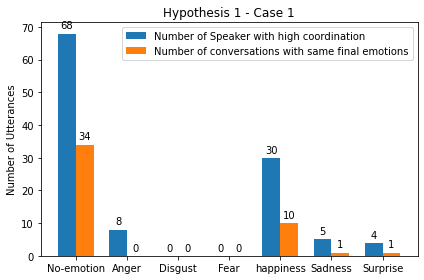

In [57]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['No-emotion', 'Anger', 'Disgust', 'Fear', 'happiness','Sadness','Surprise']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, initial_emotions, width, label='Number of Speaker with high coordination')
rects2 = ax.bar(x + width/2, final_emotion_same, width, label='Number of conversations with same final emotions')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Utterances')
ax.set_title('Hypothesis 1 - Case 1')

ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.set_xticks(x, labels)

fig.tight_layout()
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('images/image1.png')
plt.show()

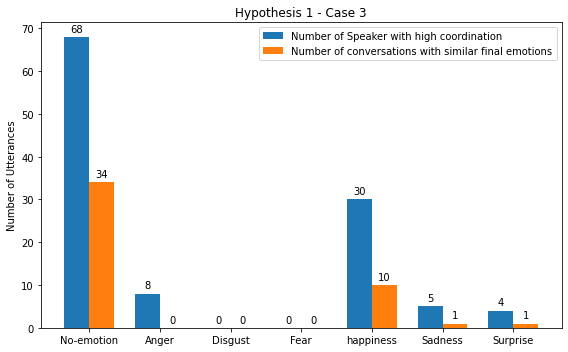

In [58]:
#graph for similar
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, initial_emotions, width, label='Number of Speaker with high coordination')
rects2 = ax.bar(x + width/2, final_emotion_similar, width, label='Number of conversations with similar final emotions')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Utterances')
ax.set_title('Hypothesis 1 - Case 3')

ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.set_xticks(x, labels)

fig.tight_layout()
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('images/image2.png')
plt.show()

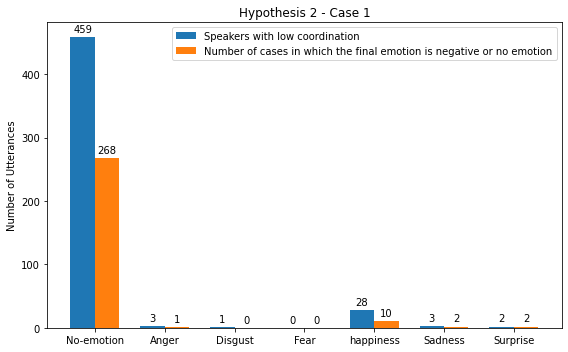

In [59]:
#Hypothesis 2 graph for input of any emotion
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, initial_emotions_hypo2, width, label='Speakers with low coordination')
rects2 = ax.bar(x + width/2, final_emotion_hypo2_negative, width, label='Number of cases in which the final emotion is negative or no emotion')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Utterances')
ax.set_title('Hypothesis 2 - Case 1')

ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.set_xticks(x, labels)

fig.tight_layout()
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('images/image3.png')
plt.show()

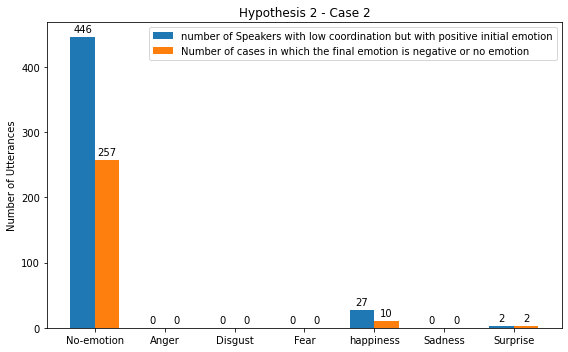

In [60]:
#Hypothesis 2 graph for input of non negative inital input
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, initial_emotion_hypo2_ini, width, label='number of Speakers with low coordination but with positive initial emotion')
rects2 = ax.bar(x + width/2, final_emotion_hypo2_initail_non_neg, width, label='Number of cases in which the final emotion is negative or no emotion')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Utterances')
ax.set_title('Hypothesis 2 - Case 2')

ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.set_xticks(x, labels)

fig.tight_layout()
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('images/image4.png')
plt.show()